<a href="https://colab.research.google.com/github/VictorCMartins/Transformada-de-Fourier-usando-Python./blob/main/Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

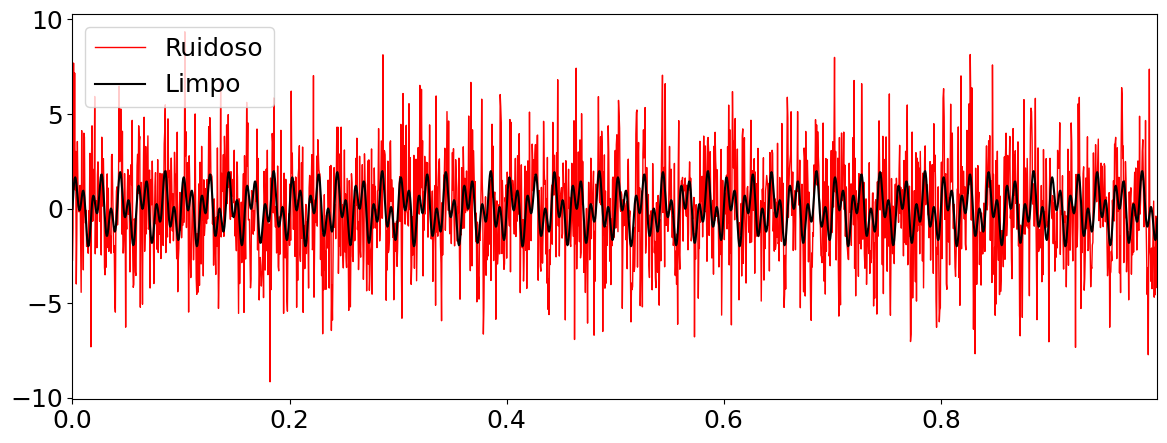

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 5]
plt.rcParams.update({'font.size': 18})

# Cria um sinal sintético com duas frequências: 120Hz e 50Hz
dt = 0.0005                                      # Espaçamento temporal utilizado
t = np.arange(0,1,dt)                            # Vetor tempo
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Soma das senoides com as frequências citadas
f_limpo = f                                      # Armazenamos o sinal limpo
f = f + 2.5*np.random.randn(len(t))              # Adiona ruído ao sinal anterior

# # Ploting
plt.plot(t, f, color='r', linewidth=1.0, label='Ruidoso')
plt.plot(t, f_limpo, color='k', linewidth=1.5, label='Limpo')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

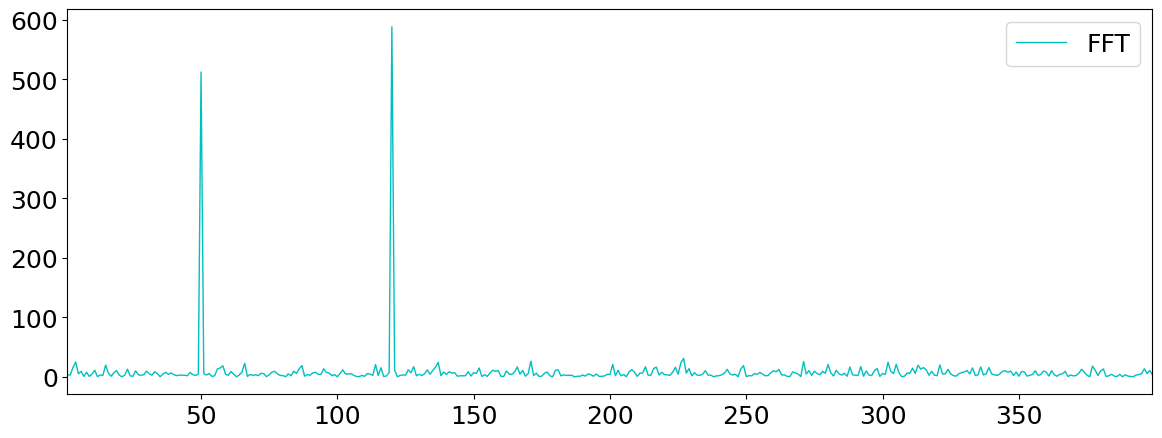

In [ ]:
## Computando a Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Computa a FFT
DEP = fhat * np.conj(fhat) / n             # Espectro de potência (potÇencia por freq)
freq = (1/(dt*n)) * np.arange(n)           # Cria um eixo de frequências, a partir do eixo temporal
L = np.arange(1,np.floor(n/5),dtype='int') # Plota apenas as primeiras frequências

# Ploting
plt.plot(freq[L], DEP[L], color='c', linewidth=1., label='FFT')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
plt.show()

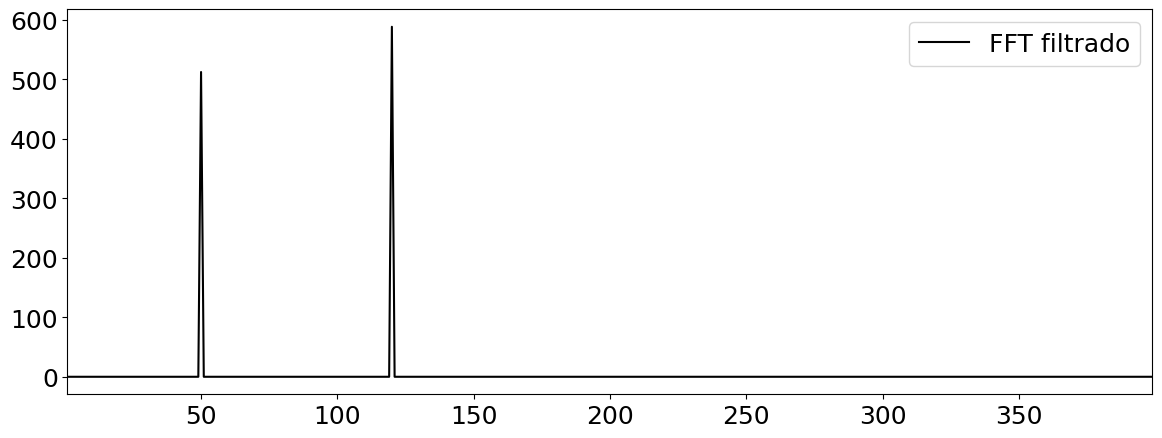

In [ ]:
## Usando a potência para filtrar o ruído
indices = DEP > 100       # Encontra as potências maiores que o threshold
DEPlimpo = DEP * indices  # Zera todos os outros indices

# Ploting
plt.plot(freq[L], DEPlimpo[L], color='k', linewidth=1.5, label='FFT filtrado')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
plt.show()

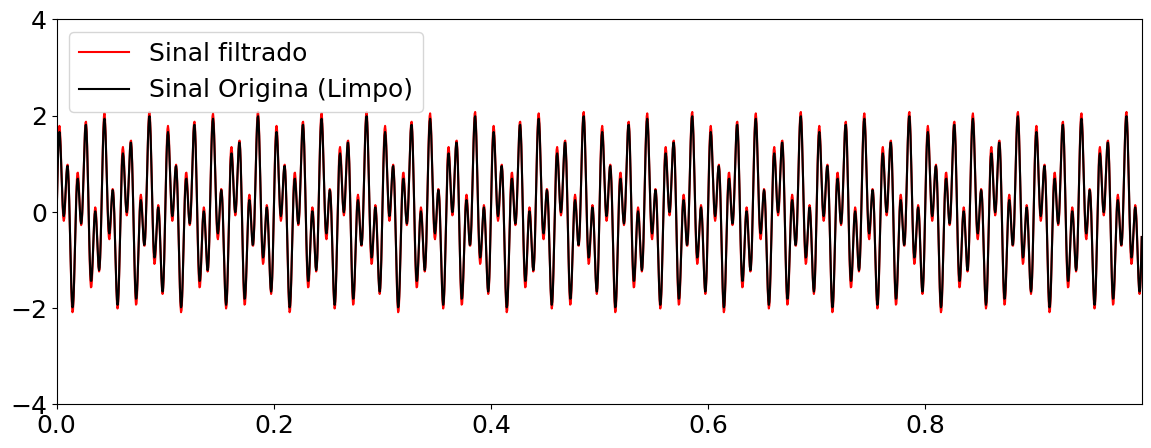

In [ ]:
fhat_filtrado = indices * fhat     # Zera todos os coeficientes da transformada de fourier
ffilt = np.fft.ifft(fhat_filtrado) # FFT inversa para o sinal filtrado
# Ploting
plt.plot(t, ffilt, color='r', linewidth=1.5, label='Sinal filtrado')
plt.plot(t, f_limpo, color='k', linewidth=1.5, label='Sinal Original (Limpo)')
plt.xlim(t[0], t[-1])
plt.ylim(-4, 4)
plt.legend()
plt.show()

(np.float64(-0.5), np.float64(416.5), np.float64(625.5), np.float64(-0.5))

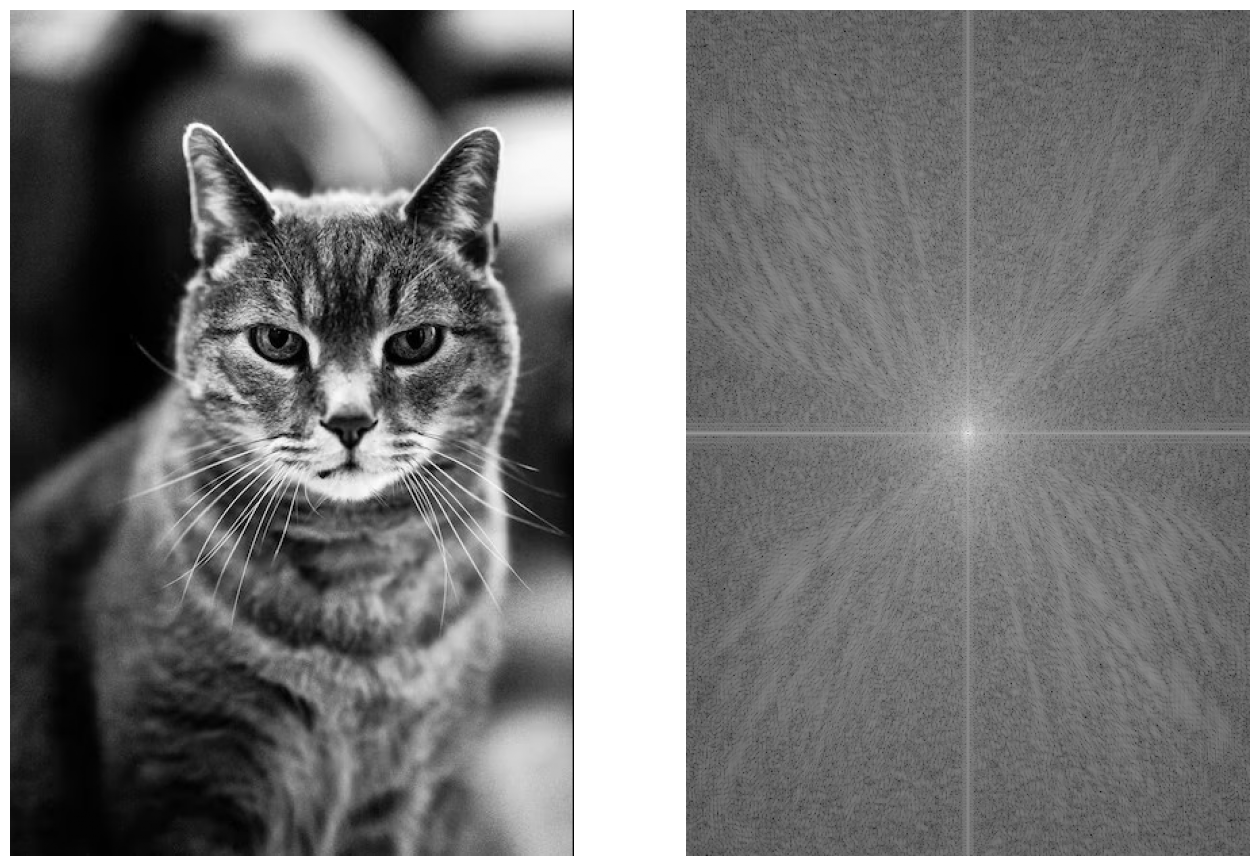

In [ ]:
from matplotlib.image import imread
import os
plt.rcParams['figure.figsize'] = [16, 15]
plt.rcParams.update({'font.size': 18})

path = '/content/gato_2.jpg'

A = imread(path)
B = np.mean(A, -1); # Converte para escala de cinza

fig,axs = plt.subplots(1,2)

# Plot da imagem
img = axs[0].imshow(B)
img.set_cmap('gray')
axs[0].axis('off')

# Computando a fft2 do gatinho
D = np.fft.fft2(B)

# Plot da imagem, usamos escala log pois alguns pixels
# tem valor extremamente pequenos
img = axs[1].imshow(np.fft.fftshift(np.log(np.abs(D))))
img.set_cmap('gray')
axs[1].axis('off')

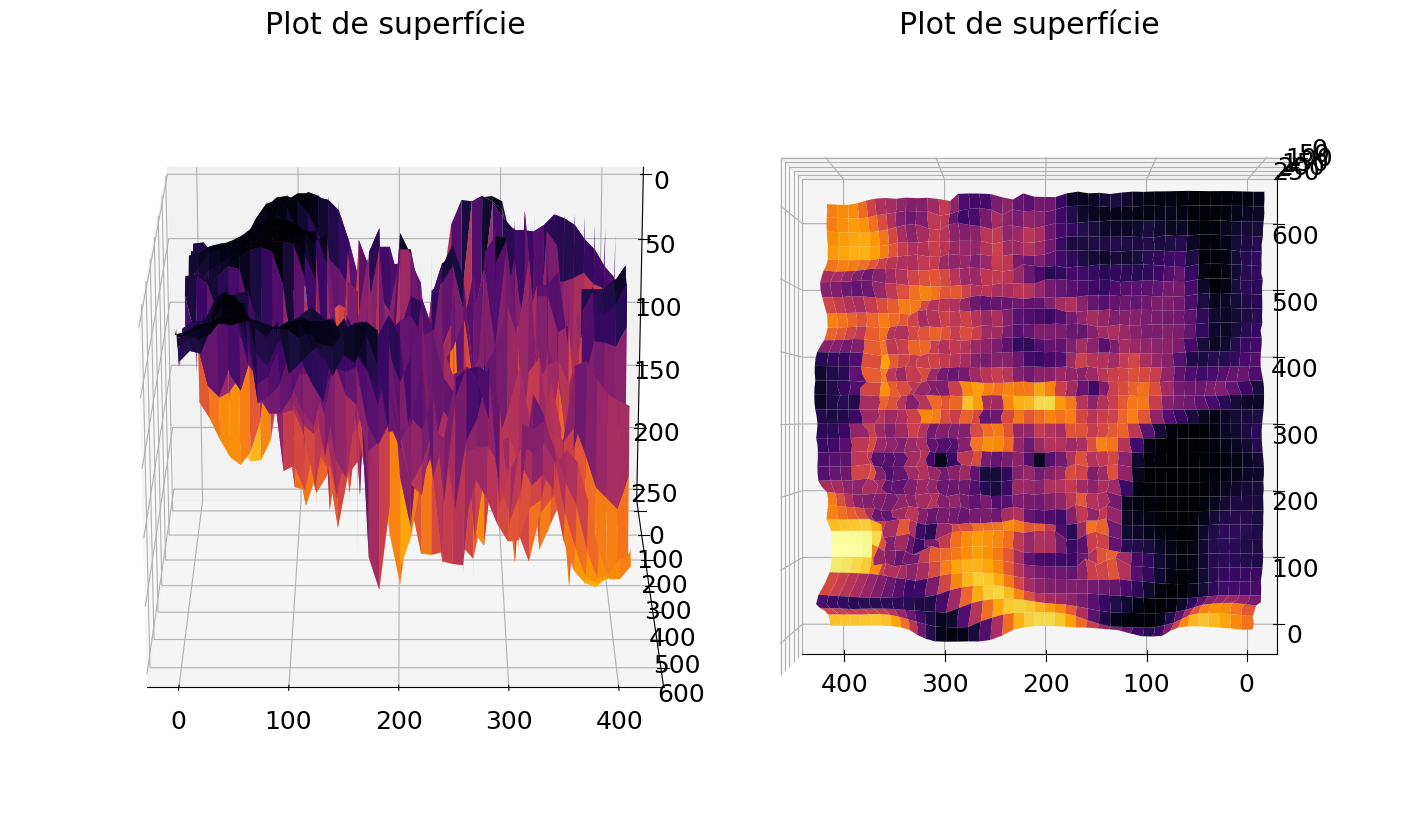

In [ ]:
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [30, 10]

# Criação de um subplot 3d para a visualização da imagem em termos de intensidade de pixel
fig = plt.figure()
ax = fig.add_subplot(122, projection='3d')
X,Y = np.meshgrid(np.arange(1, np.shape(B)[1]+1), np.arange(1, np.shape(B)[0]+1))
ax.plot_surface(X[0::10, 0::10], Y[0::10, 0::10], B[0::10, 0::10], cmap='inferno', edgecolor='none')
ax.set_title('Plot de superfície')
ax.mouse_init()
ax.view_init(270,270) #Visão lateral

# Vale dizer que esta segunda parte é desnecessária se for executar o código em um notebook,
# nele o plot é interativo
ax = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(np.arange(1, np.shape(B)[1]+1), np.arange(1, np.shape(B)[0]+1))
ax.plot_surface(X[0::10, 0::10], Y[0::10, 0::10], B[0::10, 0::10], cmap='inferno', edgecolor='none')
ax.set_title('Plot de superfície')
ax.mouse_init()
ax.view_init(200,270) #Visão superior
plt.show()